<a href="https://colab.research.google.com/github/hmehryar/Hm.JetscapeMl/blob/309-implementingtraining-pointnet-for-alpha_s-with-various-epochs-and-folds-and-finding-the-best-learning-rate/jet_ml_pointnet_alpha_s/jet_ml_pointnet_alpha_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install --upgrade tensorflow
import tensorflow as tf

In [2]:
#uncomment this cell when you are on COLAB
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
from google.colab import drive
drive.mount('/content/drive')

Found GPU at: /device:GPU:0
Mounted at /content/drive


In [3]:
import sys
sys.path.insert(1,'/wsu/home/gy/gy40/gy4065/hm.jetscapeml.source')
sys.path.insert(1,'/content/drive/My Drive/Projects/110_JetscapeMl/hm.jetscapeml.source')
sys.path.insert(1,'/content/drive/MyDrive/Projects/110_JetscapeMl/hm.jetscapeml.source')
sys.path.insert(1,'/g/My Drive/Projects/110_JetscapeMl/hm.jetscapeml.source')
sys.path.insert(1,'G:\\My Drive\\Projects\\110_JetscapeMl\\hm.jetscapeml.source')

In [4]:
# loading libraries
print('Loading/Installing Package => Begin\n\n')
import jet_ml_dataset_builder.jet_ml_dataset_builder_utilities as util
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import set_directory_paths
print('\nLoading/Installing Package => End\n\n')

Loading/Installing Package => Begin



Loading/Installing Package => End




In [5]:
print('\n########################################################################')
print('Checking the running platforms\n')
# Call the function and retrieve the dataset_directory_path and simulation_directory_path
# Access the dataset_directory_path and simulation_directory_path
dataset_directory_path, simulation_directory_path = set_directory_paths()
print('########################################################################\n')


########################################################################
Checking the running platforms

Python version: 3.10.12
OS: Linux
OS version: 6.1.58+
running on Colab: True
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Directory Path: /content/drive/MyDrive/Projects/110_JetscapeMl/hm.jetscapeml.data/
Simulation Results Path: /content/drive/MyDrive/Projects/110_JetscapeMl/hm.jetscapeml.data/simulation_results/
########################################################################



In [6]:
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import get_label_items
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import get_labels_str
label_items_dict = get_label_items()
label_str_dict=get_labels_str(label_items_dict)

Aggregatring all parameters values
label_items:
 {'y_class_label_items': ['MMAT', 'MLBT'], 'alpha_s_items': [0.2, 0.3, 0.4], 'q0_items': [1.5, 2.0, 2.5]}
Building required params for the loading the dataset file
labels_str:
 {'class_labels_str': 'MMAT_MLBT', 'alpha_s_items_str': '0.2_0.3_0.4', 'q0_items_str': '1.5_2.0_2.5'}


In [7]:
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import get_dataset
dataset_size=10000
dataset_x, dataset_y=get_dataset(dataset_size,label_str_dict, dataset_directory_path,working_column=1)

Loading the whole dataset
dataset.x: <class 'numpy.ndarray'> 10240000 (10000, 32, 32)
dataset.y: <class 'numpy.ndarray'> 30000 (10000, 3)
Extract the working column#1 for classification
dataset.x: <class 'numpy.ndarray'> 10240000 (10000, 32, 32)
dataset.y: <class 'numpy.ndarray'> 10000 (10000,)
dataset.y(working_column) sample ['0.4' '0.4' '0.2' '0.4' '0.4' '0.3' '0.4' '0.3' '0.4' '0.4']


In [8]:
from jet_ml_models.pointnet import preprocess_dataset
(x_train,  y_train,x_test,  y_test)=preprocess_dataset(dataset_x, dataset_y,is_one_hot_encoded=False)

Pre-processing
dataset_x_points shape: (10000, 1024, 3)
deleting the original dataset after splitting ...
train_points: <class 'numpy.ndarray'> 24576000 (8000, 1024, 3)
train_y: <class 'numpy.ndarray'> 8000 (8000,)
x_test_points: <class 'numpy.ndarray'> 6144000 (2000, 1024, 3)
y_test: <class 'numpy.ndarray'> 2000 (2000,)
y_test[:10]:
 ['0.4' '0.2' '0.2' '0.2' '0.3' '0.3' '0.3' '0.3' '0.3' '0.2']
Preprocess y_train and y_test
Encoding to sparse categorical variable
y_test_encoded:
 [2 0 0 0 1 1 1 1 1 0]


In [9]:
from jet_ml_models.pointnet import create_tf_dataset
# Example usage:
# Create TensorFlow Dataset for training data
dataset = create_tf_dataset(x_train, y_train)

# Create TensorFlow Dataset for test data
test_dataset = create_tf_dataset(x_test, y_test)

In [10]:
from jet_ml_models.pointnet import prepare_datasets
from jet_ml_models.pointnet import augment

# Prepare datasets for training
train_dataset, validation_dataset,test_dataset  = prepare_datasets(dataset, test_dataset, len(x_train), len(x_test), augment)

In [11]:
monitor = 'val_accuracy'  # 'val_accuracy' or 'val_loss'
n_epochs = 32

print("simulation_directory_path:",simulation_directory_path)
simulation_path=f'{simulation_directory_path}jetml_pointnet_classification_alpha_s_{label_str_dict["alpha_s_items_str"]}'
print("simulation_path:",simulation_path)
current_simulation_name=f'_size_{1000}'
current_simulation_path=simulation_path+current_simulation_name

current_simulation_name=f'_epochs_{n_epochs}'
current_simulation_path=current_simulation_path+current_simulation_name

fold=1
current_simulation_name=f'_fold_{fold}'
current_simulation_path=current_simulation_path+current_simulation_name
print(current_simulation_path)

# Use ModelCheckpoint callback to save the best model
best_model_file_path = f'{current_simulation_path}_best_model.keras'
print("best_model_file_path:",best_model_file_path)

simulation_directory_path: /content/drive/MyDrive/Projects/110_JetscapeMl/hm.jetscapeml.data/simulation_results/
simulation_path: /content/drive/MyDrive/Projects/110_JetscapeMl/hm.jetscapeml.data/simulation_results/jetml_pointnet_classification_alpha_s_0.2_0.3_0.4
/content/drive/MyDrive/Projects/110_JetscapeMl/hm.jetscapeml.data/simulation_results/jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_32_fold_1
best_model_file_path: /content/drive/MyDrive/Projects/110_JetscapeMl/hm.jetscapeml.data/simulation_results/jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_32_fold_1_best_model.keras


In [12]:
from jet_ml_models.pointnet import build_pointnet_classifier_model

NUM_POINTS = 1024
#because alpha_s can get 3 values
NUM_CLASSES = 3
activation="softmax"
# activation="sigmoid"

pointnet=build_pointnet_classifier_model(NUM_POINTS=NUM_POINTS,NUM_CLASSES=NUM_CLASSES, activation=activation)


In [13]:
from jet_ml_models.pointnet import compile_pointnet_classifier_model_with_hyperparam
from jet_ml_models.pointnet import print_model_summary
learning_rate=0.001
loss='sparse_categorical_crossentropy'
# loss='categorical_crossentropy',

metrics='sparse_categorical_accuracy'
# metrics=['accuracy'],

pointnet=compile_pointnet_classifier_model_with_hyperparam(pointnet,learning_rate=learning_rate, loss=loss,metrics=metrics, )
# print_model_summary(pointnet)

In [14]:
# pointnet.fit(train_dataset, epochs=20, validation_data=validation_dataset)

In [15]:
# %%timeit -n1 -r1
from jet_ml_models.pointnet import train_model_with_callbacks
monitor='val_sparse_categorical_accuracy'
with tf.device('/GPU:0'):
  model, history, train_time=train_model_with_callbacks(pointnet, train_dataset=train_dataset, validation_dataset=validation_dataset,monitor=monitor, best_model_file_path=best_model_file_path, n_epochs=n_epochs)

Epoch 1/32
200/200 [==============================] - ETA: 0s - loss: 2.4231 - sparse_categorical_accuracy: 0.3456
Epoch 1: val_sparse_categorical_accuracy improved from -inf to 0.35188, saving model to /content/drive/MyDrive/Projects/110_JetscapeMl/hm.jetscapeml.data/simulation_results/jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_32_fold_1_best_model.keras
200/200 [==============================] - 43s 118ms/step - loss: 2.4231 - sparse_categorical_accuracy: 0.3456 - val_loss: 2.3452 - val_sparse_categorical_accuracy: 0.3519
Epoch 2/32
200/200 [==============================] - ETA: 0s - loss: 2.2523 - sparse_categorical_accuracy: 0.3498
Epoch 2: val_sparse_categorical_accuracy improved from 0.35188 to 0.38188, saving model to /content/drive/MyDrive/Projects/110_JetscapeMl/hm.jetscapeml.data/simulation_results/jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_32_fold_1_best_model.keras
200/200 [==============================] - 18s 92ms/step - lo

In [16]:
print(train_time)
print(model)
print(history.history)

7.5456118067105615
{'loss': [2.423138380050659, 2.2522759437561035, 2.223928451538086, 2.202376365661621, 2.1804039478302, 2.1793015003204346, 2.1576263904571533, 2.135362148284912, 2.1269991397857666, 2.1138031482696533, 2.1137642860412598, 2.0992493629455566, 2.092308282852173, 2.083024263381958, 2.0772509574890137, 2.0669612884521484, 2.0775699615478516, 2.0724425315856934, 2.0634260177612305, 2.070737600326538, 2.0659825801849365, 2.0606064796447754, 2.0578556060791016], 'sparse_categorical_accuracy': [0.34562501311302185, 0.34984374046325684, 0.3607812523841858, 0.37031251192092896, 0.37953126430511475, 0.3774999976158142, 0.40312498807907104, 0.4323437511920929, 0.4375, 0.44437500834465027, 0.44749999046325684, 0.4609375, 0.4673437476158142, 0.4765625, 0.46687498688697815, 0.48359376192092896, 0.4689062535762787, 0.47203123569488525, 0.4820312559604645, 0.48093751072883606, 0.4724999964237213, 0.4801562428474426, 0.47968751192092896], 'val_loss': [2.3452417850494385, 2.1651482582

In [17]:
from jet_ml_models.pointnet import save_training_history
training_history_file_path_json,training_history_file_path_csv,training_history_file_path_csv = \
  save_training_history(history,current_simulation_path)

/content/drive/MyDrive/Projects/110_JetscapeMl/hm.jetscapeml.data/simulation_results/jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_32_fold_1_training_history.json
/content/drive/MyDrive/Projects/110_JetscapeMl/hm.jetscapeml.data/simulation_results/jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_32_fold_1_training_history.csv
/content/drive/MyDrive/Projects/110_JetscapeMl/hm.jetscapeml.data/simulation_results/jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_32_fold_1_training_history.npy


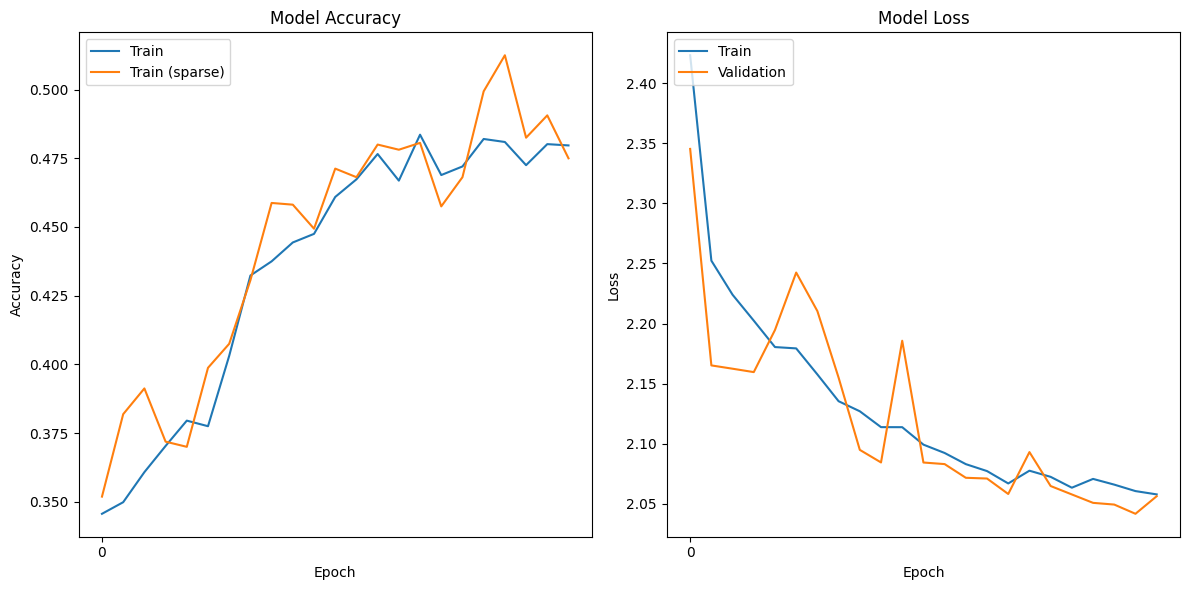

/content/drive/MyDrive/Projects/110_JetscapeMl/hm.jetscapeml.data/simulation_results/jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_32_fold_1_accuracy_loss.png


In [18]:
from jet_ml_models.pointnet import plot_training_history
plot_training_history_path=plot_training_history(history,current_simulation_path)
print(plot_training_history_path)

In [19]:
from jet_ml_models.pointnet import evaluate_model
accuracy, confusion_matrix = evaluate_model(model,test_dataset=test_dataset)

63/63 [==============================] - 2s 18ms/step
Accuracy: 0.3215
Confusion Matrix: [[234 239 210]
 [243 244 182]
 [227 256 165]]


In [20]:
from jet_ml_models.pointnet import save_kfold_results
results_kfold = []
results_kfold.append({
                  'Dataset Size': dataset_size,
                  'Classifier': model.name,
                  'Fold Number': fold,
                  'Accuracy': accuracy,
                  'Confusion Matrix': confusion_matrix,
                  'Train Time': train_time,
                  'Loss/Accuracy Plot Path': plot_training_history_path,
                  'Best Model Path': best_model_file_path
              })
save_kfold_results(results_kfold, current_simulation_path)

   Dataset Size Classifier  Fold Number  Accuracy  \
0         10000   pointnet            1    0.3215   

                                    Confusion Matrix  Train Time  \
0  [[234, 239, 210], [243, 244, 182], [227, 256, ...    7.545612   

                             Loss/Accuracy Plot Path  \
0  /content/drive/MyDrive/Projects/110_JetscapeMl...   

                                     Best Model Path  
0  /content/drive/MyDrive/Projects/110_JetscapeMl...  


,Dataset Size,Classifier,Fold Number,Accuracy,Confusion Matrix,Train Time,Loss/Accuracy Plot Path,Best Model Path
0,10000,pointnet,1,0.3215,"[[234, 239, 210], [243, 244, 182], [227, 256, ...",7.545612,/content/drive/MyDrive/Projects/110_JetscapeMl...,/content/drive/MyDrive/Projects/110_JetscapeMl...
